In [3]:
# pip install ipykernel opencv-python numpy matplotlib scikit-image

Question 1


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def load_image(path):
    img = cv2.imread(path)
    return img

In [6]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
def convert_to_binary(image, threshold=127):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image_binary = image
    image_binary[gray < threshold] = 0
    image_binary[gray >= threshold] = 255
    return image_binary

In [8]:
# TODO: create a function to show an image
def show_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

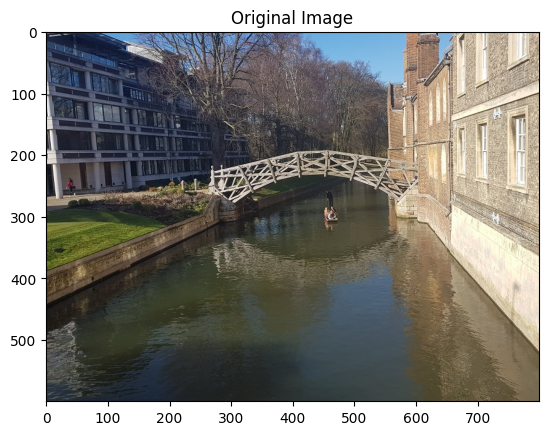

[[[100  95  86]
  [ 88  83  74]
  [ 96  89  80]
  ...
  [175 197 215]
  [145 167 185]
  [176 198 216]]

 [[113 106  97]
  [122 115 106]
  [116 109 100]
  ...
  [176 198 216]
  [178 200 218]
  [152 174 192]]

 [[ 96  87  77]
  [ 94  85  75]
  [ 96  87  78]
  ...
  [214 236 254]
  [167 189 207]
  [130 152 170]]

 ...

 [[ 60  51  41]
  [ 64  55  45]
  [ 66  57  47]
  ...
  [ 80 104 116]
  [ 80 104 116]
  [ 80 104 116]]

 [[ 56  49  40]
  [ 53  46  37]
  [ 55  46  37]
  ...
  [ 81 105 117]
  [ 81 105 117]
  [ 81 105 117]]

 [[ 58  51  42]
  [ 55  48  39]
  [ 62  53  44]
  ...
  [ 79 103 115]
  [ 79 103 115]
  [ 79 103 115]]]


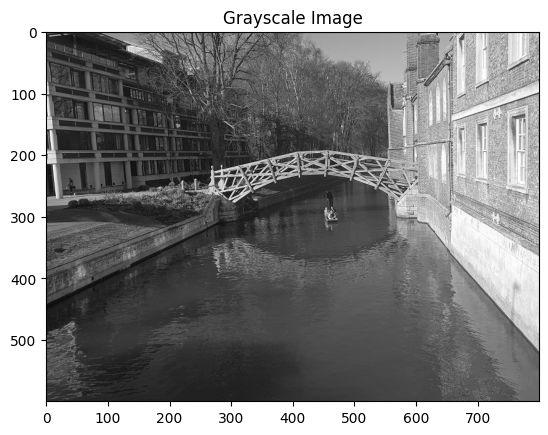

[[ 93  81  87 ... 200 170 201]
 [104 113 107 ... 201 203 177]
 [ 85  83  85 ... 239 192 155]
 ...
 [ 49  53  55 ... 105 105 105]
 [ 47  44  44 ... 106 106 106]
 [ 49  46  51 ... 104 104 104]]


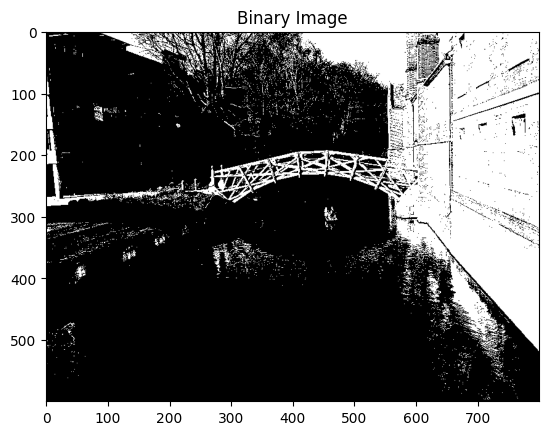

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [9]:
# Load original image (BGR)
img_bgr = load_image('image1.jpg')
show_image(img_bgr, title='Original Image')
print(img_bgr)

# Convert to grayscale from BGR (not from RGB)
gray_img = convert_to_grayscale(img_bgr)
show_image(gray_img, title='Grayscale Image')
print(gray_img)


# Convert to binary from BGR (not from RGB)
binary_img = convert_to_binary(img_bgr)
show_image(binary_img, title='Binary Image')
print(binary_img)


Question 2:

In [10]:
def GHC(image):

    min_val = np.min(image).astype(np.float64) 
    max_val = np.max(image).astype(np.float64) 
   
    return max_val - min_val 

In [11]:
# 2a
image = load_image('image2.jpg')
image = convert_to_grayscale(image)
image_contrast = GHC(image)
print(image_contrast)

247.0


In [12]:
# 2b
def brightness(image):
   return np.mean(image)

In [13]:
image = load_image('image2.jpg')
image = convert_to_grayscale(image)
brightness_value = brightness(image)
print("Brightness of the image:", brightness_value)

Brightness of the image: 97.73192043895747


In [14]:
# 2c
def increase_brightness_percent(image, percent=20):
    factor = 1 + (percent / 100)
    bright = image.astype(np.float32) * factor
    return np.clip(bright, 0, 255).astype(np.uint8)

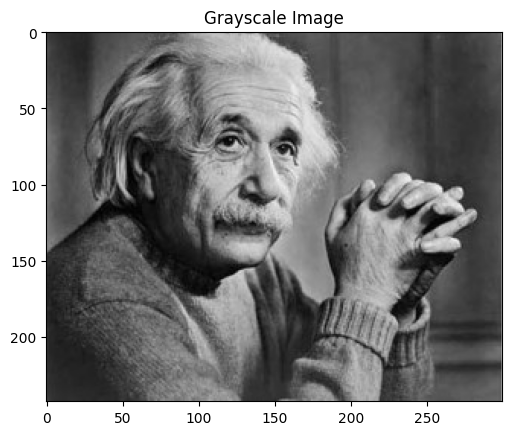

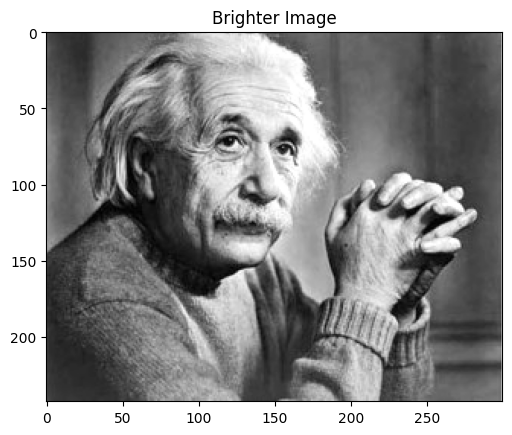

In [15]:
image = load_image('image2.jpg')
image = convert_to_grayscale(image)
show_image(image, title='Grayscale Image')

brighter = increase_brightness_percent(image, 20)
show_image(brighter, title='Brighter Image')

Question 3

In [25]:
def binary_histogram(image):
    count_0 = 100
    count_255 = 100

    plt.bar([0, 255], [count_0, count_255], color='black', width=1)
    plt.title('Binary Histogram (Manual)')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.xticks([0, 255])
    plt.show()

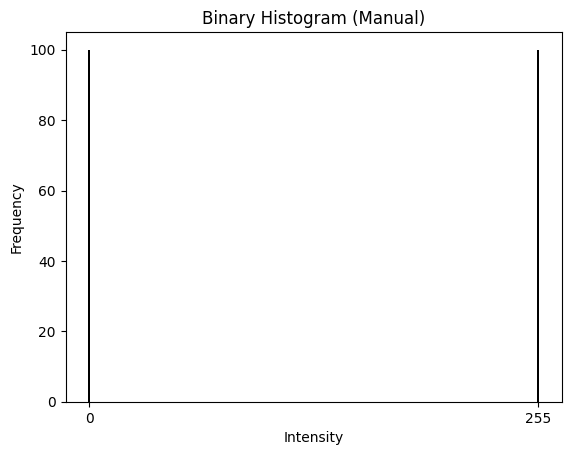

In [26]:
image = load_image('image2.jpg')
image = convert_to_binary(image)
binary_histogram(image)

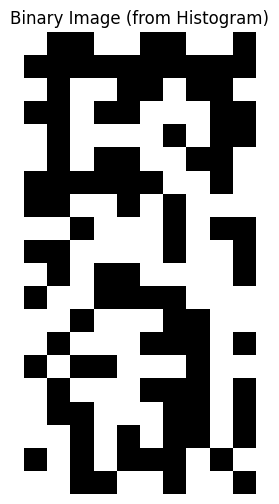

[[255   0   0 255 255   0   0 255 255   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [255   0 255 255   0   0 255   0   0 255]
 [  0   0 255   0   0 255 255 255   0   0]
 [255   0 255 255 255 255   0 255   0   0]
 [255   0 255   0   0 255 255   0   0 255]
 [  0   0   0   0   0   0 255 255   0 255]
 [  0   0 255 255   0 255   0 255 255 255]
 [255 255   0 255 255 255   0 255   0   0]
 [  0   0 255 255 255 255   0 255 255   0]
 [255   0 255   0   0 255 255 255 255   0]
 [  0 255 255   0   0   0   0 255 255 255]
 [255 255   0 255 255 255   0   0 255 255]
 [255   0 255 255 255   0   0   0 255   0]
 [  0 255   0   0 255 255 255   0 255 255]
 [255   0 255 255 255   0   0   0 255   0]
 [255   0   0 255 255 255   0   0 255   0]
 [255 255   0 255   0 255   0   0 255   0]
 [  0 255   0 255   0   0   0 255   0 255]
 [255 255   0   0 255 255   0 255 255   0]]


In [24]:
binary_hist = np.zeros(256, dtype=int)
binary_hist[0] = 100     # 100 pixels of value 0 (black)
binary_hist[255] = 100   # 100 pixels of value 255 (white)
total_pixels_bin = binary_hist.sum()

grayscale_hist = np.zeros(256, dtype=int)
for i in range(256):
    grayscale_hist[i] = int(100 * np.sin(i / 256 * np.pi)) 
total_pixels_gray = grayscale_hist.sum()

def image_from_histogram(hist, image_shape):
    pixel_values = []
    for intensity, count in enumerate(hist):
        pixel_values.extend([intensity] * count)
    total_required = image_shape[0] * image_shape[1]
    pixel_values = pixel_values[:total_required] 
    pixel_values += [0] * (total_required - len(pixel_values))  
    np.random.shuffle(pixel_values)  
    return np.array(pixel_values).reshape(image_shape).astype(np.uint8)

binary_image = image_from_histogram(binary_hist, (20, 10)) 

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (from Histogram)')
plt.axis('off')
plt.show()

print(binary_image)


In [ ]:
# End here